# Decision Trees

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (12, 8)

### Preparations

In [3]:
df = pd.read_csv('./data/train.csv', ',')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### 1. Select the target

In [5]:
y = df["Survived"]

#### 2. Select input features

In [6]:
df.loc[df['Sex'] == 'male', 'Sex'] = 1
df.loc[df['Sex'] == 'female', 'Sex'] = 0
df['Age']=df['Age'].fillna(df['Age'].mean())
X = df[['Age', "Pclass"]]

#### 3. Train-test-split

In [7]:
Xt, Xtest, yt, ytest = train_test_split(X,y, random_state=42)


#### 3. Plot the data

(-1.0, 90.0, 0.0, 4.0)

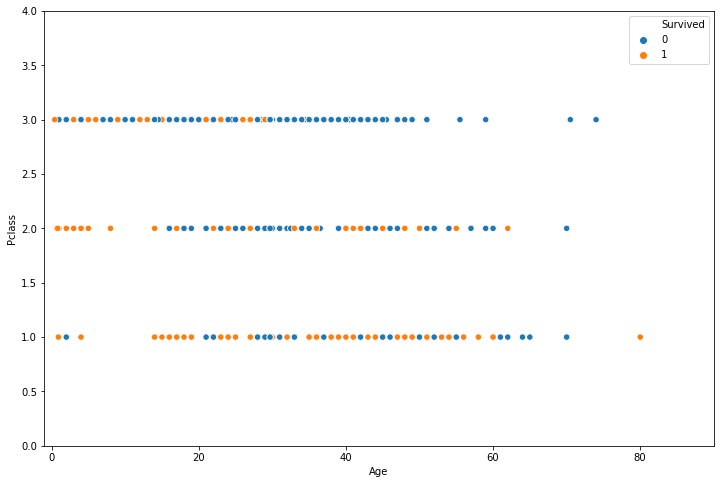

In [8]:
sns.scatterplot(x=Xt["Age"], y=Xt["Pclass"], hue=yt,s=40)
plt.axis((-1, 90, 0, 4)) 

## Decision Tree from Scratch

In [9]:
predictions = []
for i, row in Xt.iterrows(): # i: index, row: values of a row as a pd.Series
    if row['Age'] > 50:
        predictions.append(0)
    else:
        if row['Pclass'] > 2: 
            predictions.append(1)
        else: 
            predictions.append(0)

#### 6. Calculate the accuracy of the model

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(yt, predictions)

0.3458083832335329

#### Train the model

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [12]:
df['Age'].isna().sum()

0

In [13]:
m = DecisionTreeClassifier(max_depth=2)
m.fit(Xt, yt)

DecisionTreeClassifier(max_depth=2)

#### Make predictions

In [14]:
ypred = m.predict(Xt)

In [15]:
m.score(Xt, yt)  #accuracy 

0.6706586826347305

## Plot the tree

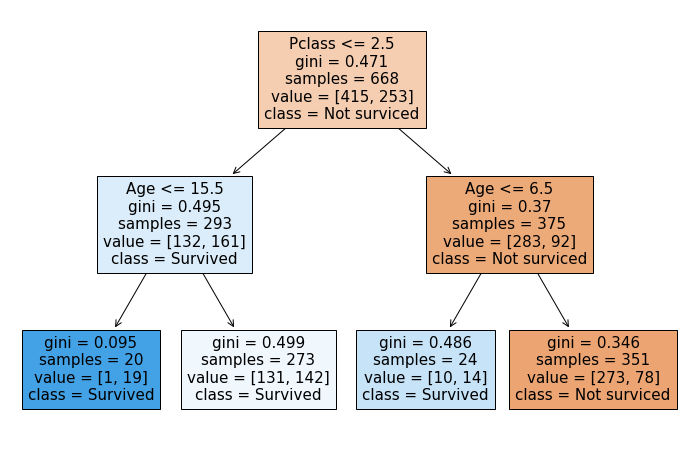

In [16]:
t = plot_tree(m, feature_names = ["Age","Pclass"], class_names=["Not surviced", "Survived"], filled=True)

In [17]:
# tree with max_depth 3
m2 = DecisionTreeClassifier(max_depth=3)
m2.fit(Xt, yt)

DecisionTreeClassifier(max_depth=3)

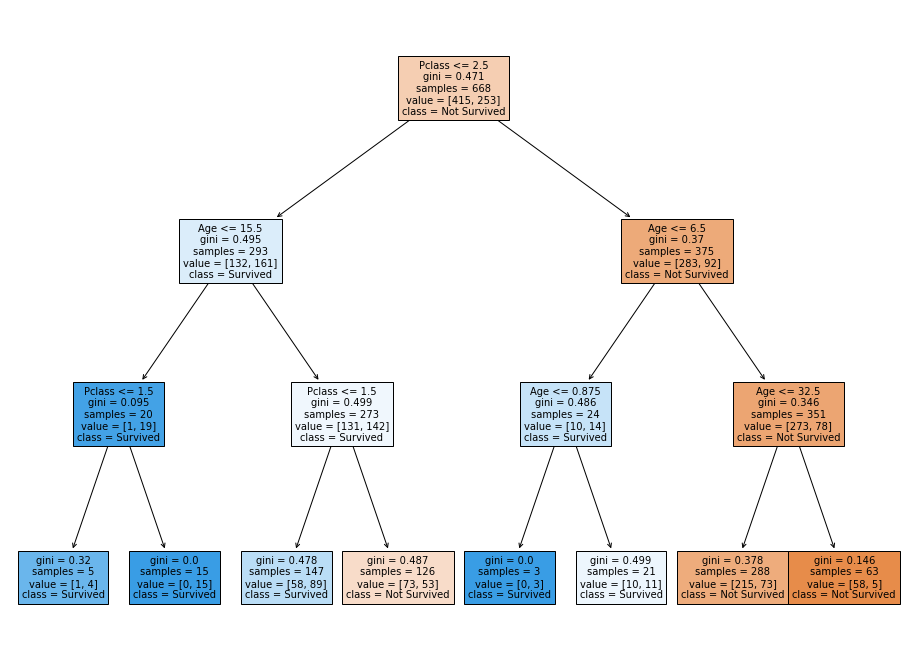

In [18]:
plt.figure(figsize=(16, 12))
t2 = plot_tree(m2, feature_names = ["Age", "Pclass"], class_names=["Not Survived", "Survived"], filled=True)